In [45]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import networkx as nx
import matplotlib.ticker as plticker
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.algorithms.approximation.dominating_set import min_weighted_dominating_set, min_edge_dominating_set
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop =stopwords.words('english')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [46]:
#Function to remove columns
def remove_unwanted_cols(dataset, cols):
    for col in cols:
        del dataset[col]
    return dataset

In [47]:
#DATA INJECTION
df1 = pd.read_csv("C:/Users/acer/OneDrive/Desktop/MATERIALE TESI/DATASET/USA election Twitter collection/unoundici.csv")
df2 = pd.read_csv("C:/Users/acer/OneDrive/Desktop/MATERIALE TESI/DATASET/USA election Twitter collection/dueundici.csv")
df3 = pd.read_csv("C:/Users/acer/OneDrive/Desktop/MATERIALE TESI/DATASET/USA election Twitter collection/treundici.csv")
df4 = pd.read_csv("C:/Users/acer/OneDrive/Desktop/MATERIALE TESI/DATASET/USA election Twitter collection/quattroundici.csv")
df5 = pd.read_csv("C:/Users/acer/OneDrive/Desktop/MATERIALE TESI/DATASET/USA election Twitter collection/cinqueundici.csv")
df6 = pd.read_csv("C:/Users/acer/OneDrive/Desktop/MATERIALE TESI/DATASET/USA election Twitter collection/seiundici.csv")
df7 = pd.read_csv("C:/Users/acer/OneDrive/Desktop/MATERIALE TESI/DATASET/USA election Twitter collection/setteundici.csv")
df8 = pd.read_csv("C:/Users/acer/OneDrive/Desktop/MATERIALE TESI/DATASET/USA election Twitter collection/ottoundici.csv")
df9 = pd.read_csv("C:/Users/acer/OneDrive/Desktop/MATERIALE TESI/DATASET/USA election Twitter collection/noveundici.csv")
#CONCATENATE OF ALL THE DATASETS
series =[df1,df2,df3,df4,df5,df6,df7,df8,df9]
df = pd.concat(series,ignore_index=True)
df= pd.DataFrame(df)

In [48]:
#944974 Tweets collected from 01/11/2020 to 09/11/2020
df.info()
#REMOVE USELESS COLUMNS
df = remove_unwanted_cols(df, ['_id', 'Followers','Number_Retweet','Position'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944974 entries, 0 to 944973
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   _id             944974 non-null  object
 1   Screen_name     944974 non-null  object
 2   Name            944949 non-null  object
 3   Text            944974 non-null  object
 4   Followers       944974 non-null  int64 
 5   Number_Retweet  944974 non-null  int64 
 6   Position        609992 non-null  object
 7   Date_time       944974 non-null  object
dtypes: int64(2), object(6)
memory usage: 57.7+ MB


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(1.0, 200000.0)

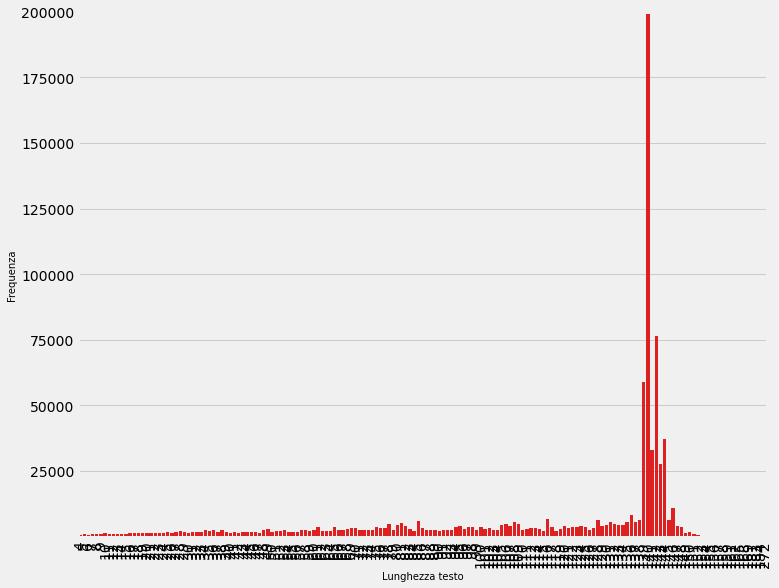

In [49]:
len_text_problem = df['Text'].str.len()
plt.figure(figsize = (11, 9))
plt.xticks(rotation=90)
sns.countplot(len_text_problem,color="red")
plt.xlabel("Lunghezza testo", size = 10)
plt.ylabel("Frequenza", size = 10)
plt.ylim([1,200000])

In [50]:
#DROP NA BASED ON TEXT Null
df = df.dropna(axis=0, subset=['Text'])
#HASHTAG EXTRAPOLATION
df["hashtags"] = df["Text"].apply(lambda x: re.findall(r"#(\w+)", x))
df["hashtags"] = [','.join(map(str, l)) for l in df["hashtags"]]

In [51]:
#ELIMINO DOVE LA COLONNA HASHTAGS PRESENTA Null Values
df = df.dropna(axis=0, subset=['hashtags'])
#REMOVE DUPLICATES
df.drop_duplicates(keep=False, inplace=True)
#NO DUPLICATES IN THE DATASET

[(0.0, 120000.0),
 Text(0.5, 0, 'Numero di Tweets'),
 Text(0, 0.5, 'Hashtag presente nel Tweet'),
 Text(0.5, 1.0, 'HASHTAGS')]

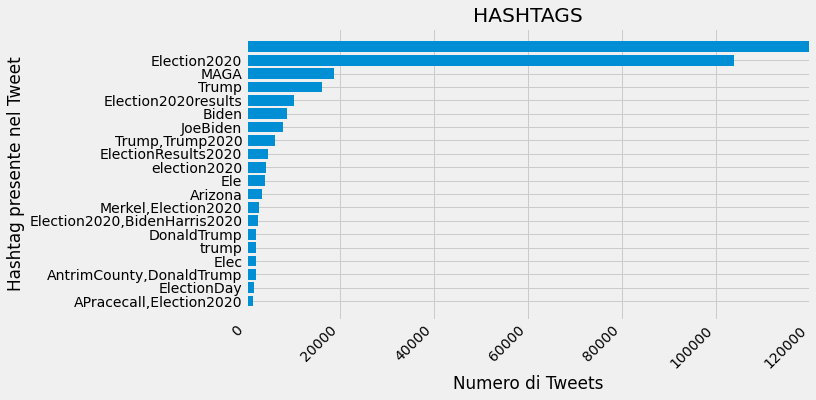

In [52]:
#HASHTAGS COUNTING
counting = df.groupby('hashtags').size().reset_index(name='count')
counting = pd.DataFrame(counting).sort_values(by=['count'], ascending = True)
counting = counting.tail(20)
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(counting['hashtags'], counting['count'])
labels = ax.get_xticklabels()
plt.style.use('fivethirtyeight')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 120000], xlabel='Numero di Tweets', ylabel='Hashtag presente nel Tweet',
       title='HASHTAGS')

In [53]:
#DATETIME CONVERTER
df["Date_time"] = df["Date_time"].astype('datetime64[ns]')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944868 entries, 0 to 944973
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Screen_name  944868 non-null  object        
 1   Name         944843 non-null  object        
 2   Text         944868 non-null  object        
 3   Date_time    944868 non-null  datetime64[ns]
 4   hashtags     944868 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 43.3+ MB


TEXT CLEANING

In [55]:
#Funzione di preprocessing:
def preprocess_tweet_text(tweet):
    tweet.lower()
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)

#rimuovo le emoji presenti nel testo:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF" 
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"# flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

df['Text_clean'] = df['Text'].apply(preprocess_tweet_text)
df['Text_clean'] = df['Text_clean'].apply(deEmojify)

TEXT EXPLORATION

>tokenization - deep cleaning

In [56]:
df['Text_to_EDA'] = df['Text_clean']

In [57]:
#eyes, nose and mouth 
emoticons_str = r"""
    (?:
        [:=;] 
        [oO\-]? 
        [D\)\]\(\]/\\OpP] 
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
    r"\U0001F600-\U0001F64F"  # emoticons
    r"\U0001F300-\U0001F5FF"  # symbols & pictographs
    r"\U0001F680-\U0001F6FF"  # transport & map symbols
    r"\U0001F1E0-\U0001F1FF"  #flags
    r"\U00002702-\U000027B0"
    r"\U000024C2-\U0001F251"# flags (iOS) 
    r"\U0001f926-\U0001f937"
    r"\U00010000-\U0010ffff"
    r"\u2640-\u2642"
    r"\u2600-\u2B55"
    r"\u200d"
    r"\u23cf"
    r"\u23e9"
    r"\u231a"
    r"\ufe0f"  # dingbats
    r"\u3030"
]
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens
df['Text_to_EDA'] = df['Text_to_EDA'].apply(preprocess) 

In [58]:
import string
punctuation = string.punctuation

def preprocess(tokenized_sentence):
  tokenized_sentence_stop = [item.lower() for item in tokenized_sentence if item.lower() not in stop] #remove stopwords
  return [item for item in tokenized_sentence_stop if item not in punctuation] #remove punctuation 

df['Text_to_EDA'] = df['Text_to_EDA'].apply(preprocess)

In [59]:
#AGGIUNGIAMO MANUALMENTE ALCUNE PUNTEGGIATURE DA RIMUOVERE (MOLTO IMPORTANTE PERCHE' I CODICI NON SEMPRE TOLGONO TUTTO 
#ED AGGIUNGERE)
#N.B. CONVIENE FARE DEI COPIA INCOLLA DIRETTAMENTE DAI TOKEN PERCHE' SPESSO I CARATTERI VENGNO RILEVATI IN MODO DIVERSO
stop = set(stop)
stop.add("rt")
stop.add("…")
stop.add("n")
stop.add("’".lower())
stop.add("🇺")
stop.add("s")
stop.add("S".lower())
stop.add("nstay".lower())
stop.add(":/")
stop.add("nhttps".lower())
stop.add("https".lower())
stop.add("I")
stop.add("The")
stop.add("“")
stop.add("”")
stop.add("u")
stop.add("🇸")
stop.add("e")
stop.add("n")
stop.add("o")
stop.add("t")
stop.add("r")


stop = list(stop)
print(stop)

['o', 'through', 't', 'y', 'for', 'just', 'those', 'hers', 'the', 'was', 'between', 'why', 'n', 'nhttps', 'I', 'while', 'u', 'wasn', 'itself', 'and', 'you', 'weren', 'our', 'd', 'who', 'but', 'if', 'its', 'mustn', 'out', "hasn't", 'yourself', "won't", 'she', 'once', "doesn't", 'your', 'at', 'here', 'him', "that'll", 'not', 'm', 'more', "didn't", '…', 'so', "weren't", 'me', 'their', 'The', 'ain', 'most', "should've", '”', "don't", 'all', 'this', "you've", 'should', "hadn't", "you'll", '🇸', 'up', 'they', 'hasn', 'there', 'were', 'my', 'theirs', 'same', 'himself', 'her', 'shouldn', 'when', 'in', "shouldn't", 'nor', "isn't", 'it', 'r', 'no', 'isn', 'of', 'https', 'only', 'did', 'before', 'herself', 'other', 'few', "wouldn't", 'nstay', 'hadn', "needn't", 'now', 'am', "you'd", 'yours', '🇺', 'how', "mightn't", 'very', 'myself', 'are', 'on', 'because', 'ourselves', 'from', 'won', 's', "haven't", 'each', 'we', "it's", 'll', 'an', 'he', 're', 'what', 'rt', 'a', 'over', 'is', 'ma', 'again', 'ours

In [60]:
import string
punctuation = string.punctuation

def preprocess(tokenized_sentence):
  tokenized_sentence_stop = [item.lower() for item in tokenized_sentence if item.lower() not in stop] #remove stopwords
  return [item for item in tokenized_sentence_stop if item not in punctuation] #remove punctuation 

df['Text_to_EDA'] = df['Text_to_EDA'].apply(preprocess)

In [61]:
from collections import Counter
import itertools

sentences = (list(itertools.chain(df['Text_to_EDA'])))
flat_list = [item for sublist in sentences for item in sublist]
flat_list[:30]

c = Counter(flat_list)
list_common_tokens = c.most_common(20)
list_common_tokens

[('2020', 324446),
 ('election', 269781),
 ('trump', 171897),
 ('biden', 150138),
 ('president', 78548),
 ('vote', 56921),
 ('joe', 55478),
 ('america', 45627),
 ('us', 43898),
 ('people', 37707),
 ('media', 37254),
 ('votes', 36782),
 ('one', 36598),
 ('amp', 34922),
 ('results', 34037),
 ('maga', 33452),
 ('see', 31294),
 ('like', 30480),
 ('states', 29879),
 ('win', 29784)]

[(0.0, 350000.0),
 Text(0.5, 0, 'Token frequency'),
 Text(0, 0.5, 'Token'),
 Text(0.5, 1.0, 'TOKENS')]

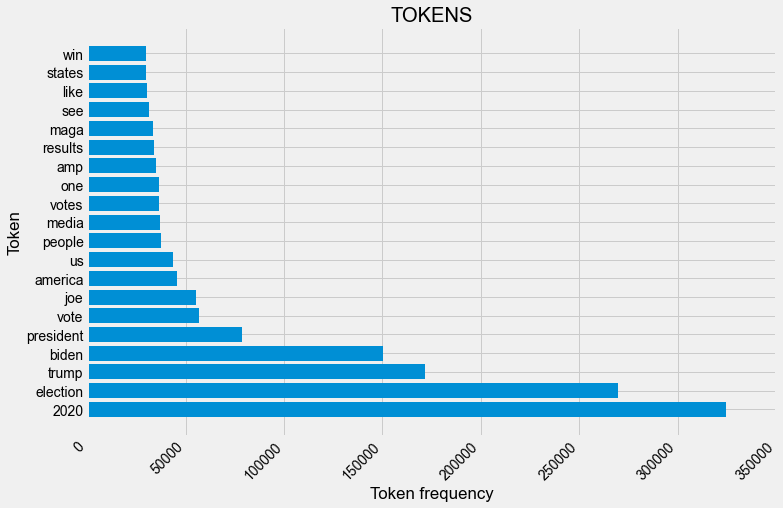

In [62]:
common_tokens = pd.DataFrame(list_common_tokens, columns=['Token','Frequency'])
common_tokens
fig, ax = plt.subplots(figsize=(11, 7))
ax.barh(common_tokens['Token'], common_tokens['Frequency'])
labels = ax.get_xticklabels()
plt.style.use('seaborn-ticks')
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[0, 350000], xlabel='Token frequency', ylabel='Token',
       title='TOKENS')

In [63]:
#RETWEET EXTRAPOLATION
df["Retweet"] = df["Text"].apply(lambda x: re.findall(r"RT @(\w+)", x))
df["Retweet"] = df['Retweet'].apply(', '.join)
df['Retweet'].replace(r'^\s*$', np.nan, regex=True, inplace = True)

In [64]:
#ISOLATE DAY
df['Day'] = df.Date_time.dt.day

In [65]:
df = remove_unwanted_cols(df,['Date_time', 'hashtags','Text'])

In [66]:
df.groupby(['Day']).size()

Day
1     11170
2     39463
3    108367
4    103313
5    105319
6    100082
7    387140
8     56751
9     33263
dtype: int64

In [22]:
df = df[['Screen_name', 'Retweet','Name','Text_clean','Day']]
df['Screen_name'] = df['Screen_name'].replace('', np.nan)
df['Retweet'] = df['Retweet'].replace('', np.nan)
df = df[df['Retweet'].notna()]
df = df[df['Screen_name'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663685 entries, 1 to 944973
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Screen_name  663685 non-null  object
 1   Retweet      663685 non-null  object
 2   Name         663666 non-null  object
 3   Text_clean   663685 non-null  object
 4   Day          663685 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 30.4+ MB


In [23]:
#SAVE PREPROCESSED DATASET
df.to_csv('C:/Users/acer/OneDrive/Desktop/MATERIALE TESI/DATASET/USA election Twitter collection/Preprocessed_dataset.csv',index=False)